# **Customer Segmentation in E-Commerce using Data Analytic**

### *By Irfansyah Aswaly*

## **1. Intoduction**

Customer segmentation is very important in e-commerce to understand customer behavior and improve marketing strategies. In this project, we will use data analysis techniques to group customers based on their purchasing patterns.

## **2. Importing Libraries**

In [1]:
# Import the main library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import libraries for machine learning
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

## **3. Loading the Dataset**

In [2]:
# Load dataset from CSV file
df = pd.read_csv('ecommerce_customer_data.csv')

# Show first 5 rows
df.head()

,customer_id,name,email,age,gender,annual_income,total_purchases,avg_purchase_value,days_since_last_purchase,customer_satisfaction,churn
0,a3071abd-8922-4608-95af-676364cb411d,Erica Powers,houseariana@example.net,56,Male,41672,11,170.75,14,5,0
1,114a0236-61b3-4447-964c-dbe6ac3d0773,Sarah Jones,ufranklin@example.org,46,Female,78217,9,63.17,8,4,0
2,c2fcf312-df91-400a-ab0e-822c1fab051a,Jaime Peterson,james10@example.com,32,Female,28279,10,55.09,8,2,0
3,7885497e-eb68-4c32-b4a3-b110d6af8aae,Rebecca Wolfe,pricedustin@example.org,60,Female,17017,15,110.88,18,4,0
4,b212448f-04ae-4943-a90e-0c8500b486fc,Kenneth Peterson,qwyatt@example.net,25,Male,56600,10,158.37,42,3,1


## **4. Data Understanding & Cleaning**

### 4.1 Checking Dataset Information

In [3]:
# General information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               1000 non-null   object 
 1   name                      1000 non-null   object 
 2   email                     1000 non-null   object 
 3   age                       1000 non-null   int64  
 4   gender                    1000 non-null   object 
 5   annual_income             1000 non-null   int64  
 6   total_purchases           1000 non-null   int64  
 7   avg_purchase_value        1000 non-null   float64
 8   days_since_last_purchase  1000 non-null   int64  
 9   customer_satisfaction     1000 non-null   int64  
 10  churn                     1000 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 86.1+ KB


### 4.2 Checking Missing Values

In [4]:
# Check the amount of missing data in each column
df.isnull().sum()

customer_id                 0
name                        0
email                       0
age                         0
gender                      0
annual_income               0
total_purchases             0
avg_purchase_value          0
days_since_last_purchase    0
customer_satisfaction       0
churn                       0
dtype: int64

### 4.3 Checking for Duplicates

In [5]:
# Remove duplicate data if any
df.drop_duplicates(inplace=True)

## **5. Exploratory Data Analysis (EDA)**

### 5.1 Statistical Summary

In [6]:
# Descriptive statistics of the dataset
df.describe()

,age,annual_income,total_purchases,avg_purchase_value,days_since_last_purchase,customer_satisfaction,churn
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.986000,50852.235000,9.967000,109.875260,28.824000,2.947000,0.310000
std,13.497852,15009.184041,3.153388,52.173485,29.470961,1.453377,0.462725
min,18.000000,6179.000000,2.000000,21.110000,0.000000,1.000000,0.000000
25%,29.000000,40770.250000,8.000000,64.660000,8.000000,2.000000,0.000000
50%,42.000000,50631.000000,10.000000,108.465000,19.000000,3.000000,0.000000
75%,52.000000,60796.750000,12.000000,155.690000,42.000000,4.000000,1.000000
max,64.000000,97896.000000,21.000000,199.880000,225.000000,5.000000,1.000000


### 5.2 Visualizing Customer Distribution

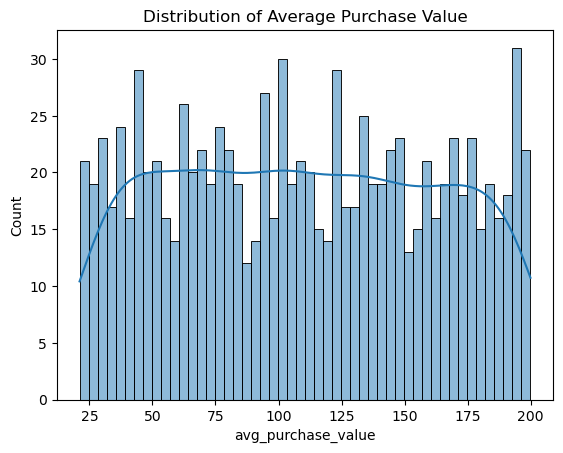

In [8]:
# Distribution of customer average purchase value
sns.histplot(df['avg_purchase_value'], bins=50, kde=True)
plt.title('Distribution of Average Purchase Value')
plt.show()

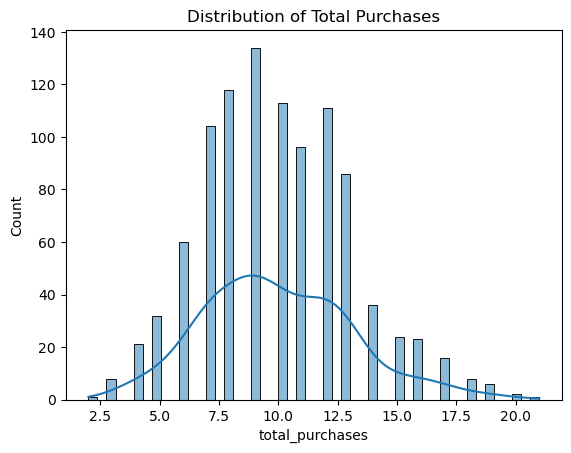

In [9]:
# Distribution of total number of purchases
sns.histplot(df['total_purchases'], bins=50, kde=True)
plt.title('Distribution of Total Purchases')
plt.show()

### 5.3 Visualizing Relationship Between Features

In [12]:
df['purchase_frequency'] = df['total_purchases'] / df['days_since_last_purchase'].replace(0, 1)

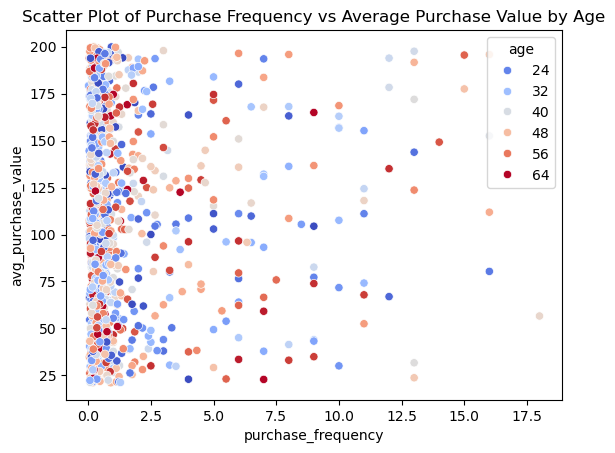

In [15]:
# Scatter plot between purchase_frequency and purchase_amount
sns.scatterplot(x='purchase_frequency', y='avg_purchase_value', hue='age', palette='coolwarm', data=df)
plt.title('Scatter Plot of Purchase Frequency vs Average Purchase Value by Age')
plt.show()

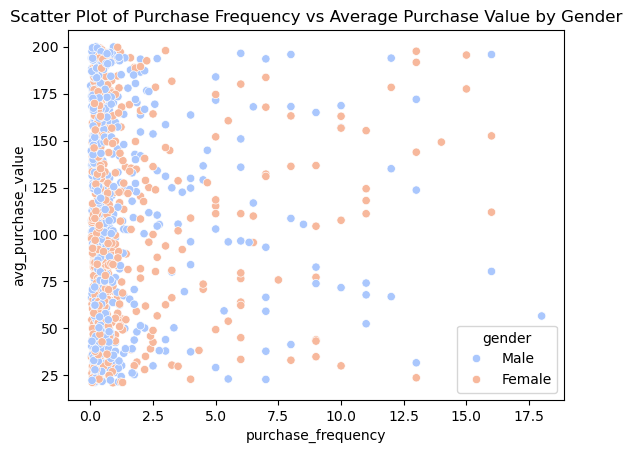

In [16]:
# Scatter plot between purchase_frequency and avg_purchase_value based on gender
sns.scatterplot(x='purchase_frequency', y='avg_purchase_value', hue='gender', palette='coolwarm', data=df)
plt.title('Scatter Plot of Purchase Frequency vs Average Purchase Value by Gender')
plt.show()

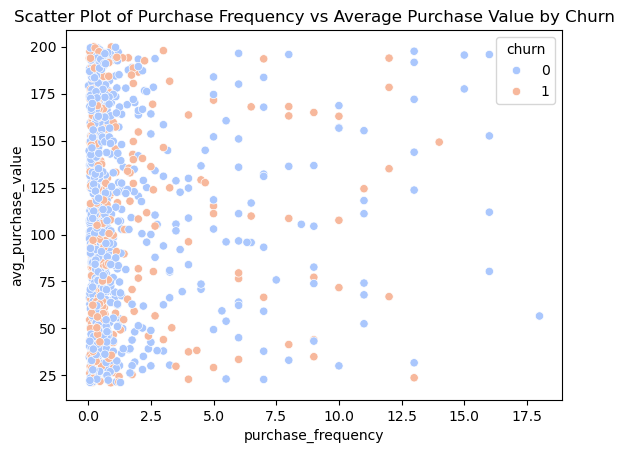

In [17]:
# Scatter plot between purchase_frequency and avg_purchase_value based on churn
sns.scatterplot(x='purchase_frequency', y='avg_purchase_value', hue='churn', palette='coolwarm', data=df)
plt.title('Scatter Plot of Purchase Frequency vs Average Purchase Value by Churn')
plt.show()

## **6. Data Pre-Processing**

### 6.1 Selecting Relevant Features

In [19]:
# Select the appropriate feature
features = ['avg_purchase_value', 'purchase_frequency', 'total_purchases']
df_selected = df[features]

### 6.2 Normalizing the Data

In [20]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

## **7. Clustering using K-Means**

### 7.1 Finding the Optimal Number of Clusters (Elbow Method)

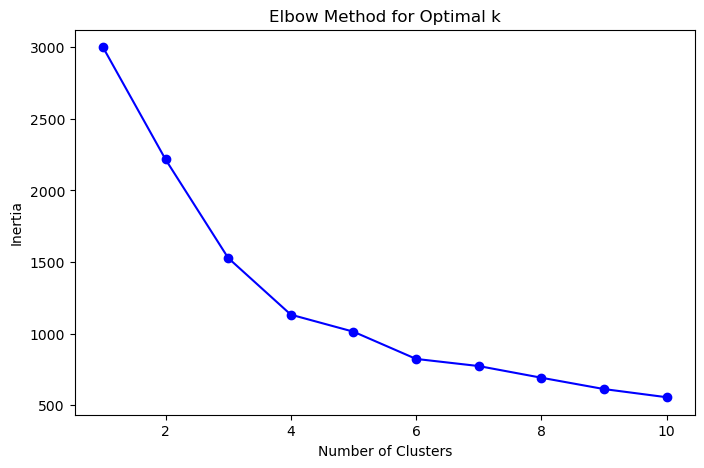

In [21]:
# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

### 7.2 Applying K-Means Clustering

In [22]:
# Using K-Means with the optimal number of clusters (eg k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

## **8. Visualizing Customer Segments**

### 8.1 PCA for Dimensionality Reduction

In [23]:
# Using PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Store PCA results in a dataframe
df['pca1'] = df_pca[:, 0]
df['pca2'] = df_pca[:, 1]

### 8.2 Scatter Plot of Clusters

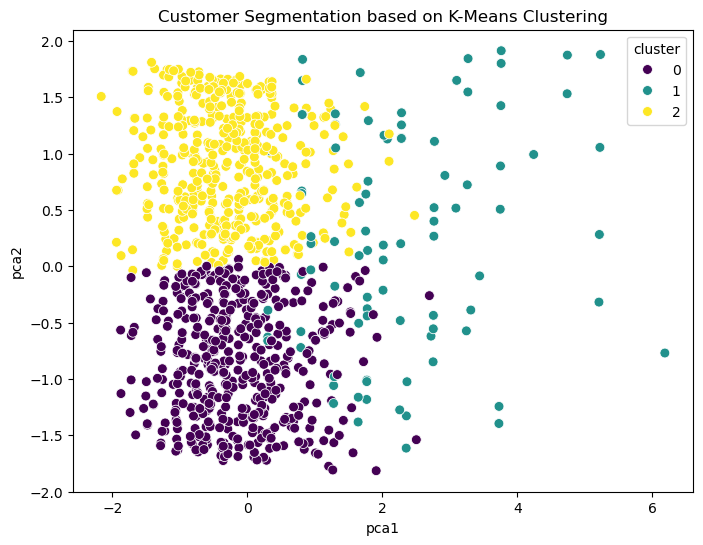

In [24]:
# Cluster visualization of K-Means results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['pca1'], y=df['pca2'], hue=df['cluster'], palette='viridis', s=50)
plt.title('Customer Segmentation based on K-Means Clustering')
plt.show()

## **9. Conclusion**

From the clustering results, we can identify **three customer** segments based on their purchasing patterns:
1. **High-value customers:** Customers with a high number of purchases and frequent transactions.
2. **Regular customers:** Customers with a stable shopping frequency.
3. **Low-value customers:** Customers with low transactions and who rarely shop.

By understanding customer segmentation, e-commerce can develop more effective marketing strategies, such as **loyalty programs**, **targeted promotions**, and **customer retention strategies**.